<h1 style="background-color:Green;font-size:36pt;color:white">Non-Linear regression</h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

# Importing needed packages

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

import pylab as pl # convenient for interactive calculations and plotting

from sklearn import linear_model # To model data
from sklearn.metrics import r2_score # To perform evaluation
from sklearn.preprocessing import PolynomialFeatures # To perform polynomial regression

from scipy.optimize import curve_fit

If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression since linear regression presumes that the data is linear. 

Non-linear regression is a method to model the non-linear relationship between the independent variables  𝑥  and the dependent variable 𝑦.

# Downloading Data

To download the data, we will use China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [23]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv')

# Take a look at the dataset
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


# Plotting the Data

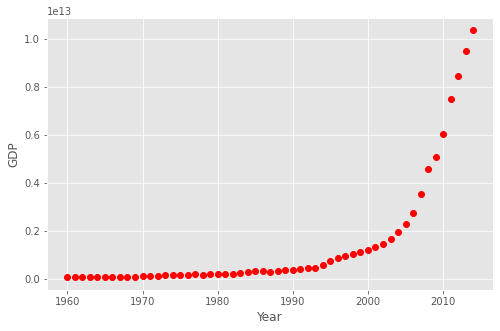

In [60]:
# Setting the figure size
plt.figure(figsize = (8, 5))

# Creating a copy of the Df
plotdf = df.copy()

# Setting 'Year' as index
plotdf.set_index('Year', inplace = True)

# Plotting 
plotdf['Value'].plot(style = 'ro')

# Labels
plt.ylabel('GDP')
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

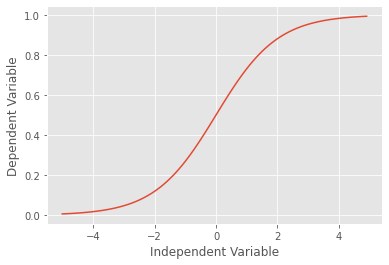

In [61]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Building the model

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.

# Using all the data in the trainning set

In [159]:
# Lets code the function of the model
def sigmoid(x, B1, B2):
    return 1/(1 + np.exp(-B1*(x - B2)))

beta_1 = 690.4517109968472, beta_2 = 0.9972071272536187


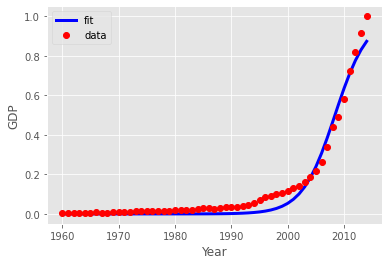

Mean absolute error: 0.030495070474619468
Residual sum of squares (MSE): 0.0015564975055692603
R2-score: 0.9724016820488531


In [104]:
# Normalizing data, using the maximum value
x_data = df.Year.values / df.Year.values.max()
y_data = df.Value.values / df.Value.values.max()

# Fitting data to sigmoid curve
popt, pcov = curve_fit(sigmoid, x_data, y_data)

# Print the final parameters
B1 = popt[0]
B2 = popt[1]
print(f'beta_1 = {B1}, beta_2 = {B2}')

# Logistic function
Y_pred = sigmoid(x_data, *popt)

# Plotting
plt.plot(df.Year.values, Y_pred, color = 'b', linewidth = 3, label = 'fit')
plt.plot(df.Year.values, y_data, 'ro', label='data')

# Labels
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Evaluating the model
print(f'Mean absolute error: {np.mean(np.absolute(Y_pred - y_data))}')
print(f'Residual sum of squares (MSE): {np.mean((Y_pred - y_data) ** 2)}')
print(f'R2-score: {r2_score(Y_pred, y_data)}')

## Splitting the data into trainning and test set

Beta1 = 707.7730452686927, Beta2 = 0.997137108580742


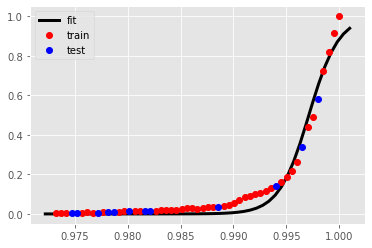

Mean absolute error: 0.022958893354800707
Residual sum of squares (RSE): 0.0009240067637241138
R2-score: 0.976811122107119


In [186]:
# Getting data
data = df.copy()

# Normalizing data
data['Year'] = data['Year'] / data['Year'].max()
data['Value'] = data['Value'] / data['Value'].max()

# Setting 'Year' as index
#data.set_index('Year', inplace = True)

# Splitting data into trainning and test set
choose = np.random.rand(len(data)) < 0.8
train = data[choose]
test = data[~choose]

# Getting data for trainning and test
x_train = train['Year']
y_train = train['Value']
x_test = test['Year']
y_test = test['Value']

# Curve fitting
popt, pcov = curve_fit(sigmoid, x_train, y_train)

# Printing parameters
print(f'Beta1 = {popt[0]}, Beta2 = {popt[1]}')

# Plotting
x = np.linspace(data.Year.min()-0.001, data.Year.max()+0.001)
y = sigmoid(x, *popt)
plt.plot(x, y, linewidth = 3, label = 'fit', color = 'black')

plt.plot(x_train, y_train, 'ro', label = 'train')
plt.plot(x_test, y_test, 'bo', label = 'test')
plt.legend(loc = 'best')
plt.show()

# Making predictions
y_hat = sigmoid(x_test, *popt)

# Evaluating the model
print(f'Mean absolute error: {np.mean(np.absolute(y_hat - y_test))}')
print(f'Residual sum of squares (RSE): {np.mean((y_hat - y_test)**2)}')
print(f'R2-score: {r2_score(y_hat, y_test)}')

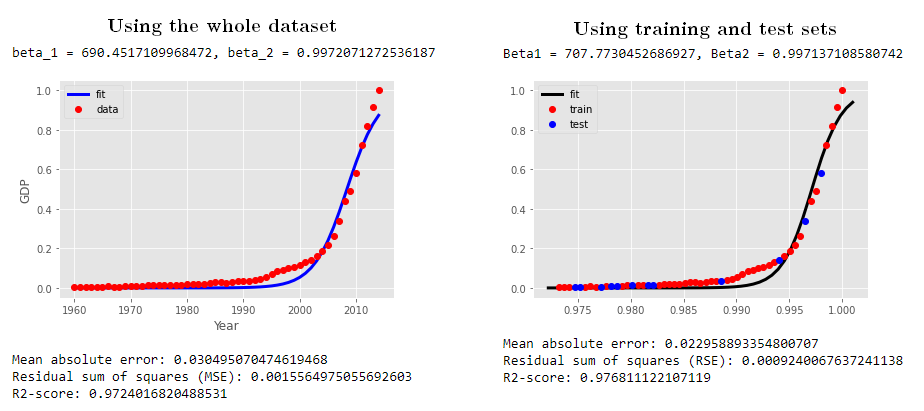

<center>
As we can see, we get better results by splitting data into training and test sets.
</center>